In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv('./movie_lens_genre_separated.tsv', sep='\t')

In [2]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [3]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [4]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [5]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


In [6]:
#1.An aggregate (e.g., average) of the movie ratings for each particular genre.
mean_ratings_byGenre = data.pivot_table('rating', index='genres', aggfunc='mean')
mean_ratings_byGenre[:10]

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


In [7]:
mean_ratings = data.pivot_table('rating', index='genres', columns='occupation', aggfunc='mean')

In [10]:
mean_ratings

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011
Crime,3.687085,3.659342,3.678039,3.742811,3.723450,3.696655,3.802857,3.736324,3.575758,3.642346,...,3.652772,3.768506,3.832487,3.734596,3.801012,3.737569,3.713289,3.635569,3.634085,3.651598
Documentary,3.581633,3.984887,4.028933,3.852632,3.962887,3.886598,4.013245,3.915134,3.900000,3.800000,...,3.854545,3.844221,3.970588,3.917763,3.987500,3.933492,4.024129,3.640000,3.727273,3.967914
Drama,3.782167,3.754293,3.732216,3.790601,3.748794,3.739991,3.871756,3.766663,3.627545,3.791185,...,3.743350,3.840207,3.949047,3.788018,3.836070,3.791983,3.800158,3.738553,3.619308,3.653348
Fantasy,3.298039,3.456388,3.424432,3.472675,3.363636,3.431478,3.486842,3.471070,3.407895,3.606357,...,3.426315,3.497192,3.678019,3.600000,3.545362,3.494278,3.528097,3.420833,3.230900,3.338421


In [67]:
#2. The top 5 highest ranked genre by occupation.
#organized into an array. first element in the tuple is occupation, and the second element in the tuple is the genres.
array = [(each_occupation, mean_ratings[each_occupation].nlargest(5).index) for each_occupation in mean_ratings]
array

    
    
    

[('K-12 student',
  Index(['Film-Noir', 'War', 'Drama', 'Crime', 'Mystery'], dtype='object', name='genres')),
 ('academic/educator',
  Index(['Film-Noir', 'Documentary', 'War', 'Drama', 'Musical'], dtype='object', name='genres')),
 ('artist',
  Index(['Film-Noir', 'Documentary', 'War', 'Drama', 'Mystery'], dtype='object', name='genres')),
 ('clerical/admin',
  Index(['Film-Noir', 'War', 'Musical', 'Documentary', 'Animation'], dtype='object', name='genres')),
 ('college/grad student',
  Index(['Film-Noir', 'Documentary', 'War', 'Drama', 'Crime'], dtype='object', name='genres')),
 ('customer service',
  Index(['Film-Noir', 'Documentary', 'Animation', 'War', 'Drama'], dtype='object', name='genres')),
 ('doctor/health care',
  Index(['Documentary', 'Film-Noir', 'War', 'Drama', 'Crime'], dtype='object', name='genres')),
 ('executive/managerial',
  Index(['Film-Noir', 'Documentary', 'War', 'Drama', 'Crime'], dtype='object', name='genres')),
 ('farmer',
  Index(['Documentary', 'Film-Noir', 'W

In [70]:
age_mean_ratings = data.pivot_table('rating', index='title', columns='age', aggfunc='count')

In [71]:
age_mean_ratings

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,12.0,22.0,30.0,2.0,8.0,NaN
'Night Mother (1986),2.0,3.0,26.0,21.0,6.0,9.0,3.0
'Til There Was You (1997),4.0,16.0,48.0,20.0,6.0,4.0,6.0
"'burbs, The (1989)",2.0,90.0,115.0,55.0,11.0,24.0,6.0
...And Justice for All (1979),2.0,14.0,116.0,140.0,40.0,58.0,28.0
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.0,1.0,16.0,9.0,1.0,1.0,NaN
Zero Effect (1998),16.0,120.0,288.0,92.0,34.0,36.0,16.0
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [80]:
#3. The most popular (with most ratings) movie by age group.
array1 = [(each_age, age_mean_ratings[each_age].idxmax(axis = 0)) for each_age in age_mean_ratings]
array1

[(1, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (18, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (25, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (35, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (45, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (50, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (56, 'Star Wars: Episode V - The Empire Strikes Back (1980)')]

In [87]:
#4. A breakdown of a movie's ratings by occupation, using any movie of your choice.
#I used $1,000,000 Duck (1971) here.

In [81]:
mean_ratings_byOccupation = data.pivot_table('rating', index='title', columns='occupation', aggfunc='mean')

In [86]:
mean_ratings_byOccupation.head(1)

occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",3.8,2.166667,NaN,4.0,2.8,4.0,3.0,3.0,NaN,3.666667,...,NaN,1.0,2.0,NaN,NaN,5.0,3.5,NaN,3.5,2.333333


In [141]:
#5. A function that given a user id, returns: (1) this user's age and occupation, (2)
#the average rating given by this user, and (3) his highest and lowest rated movie(s)
def lookUp(userId):
    df = data.loc[data['user_id'] == userId]
    age = df.at[df.index[0], 'age']
    occupation = df.at[df.index[0], 'occupation']
    ratings_by_user = df.pivot_table('rating', index='title', columns='user_id', aggfunc='mean')
    mean_rating = float(ratings_by_user.mean(axis = 0))
    max_value = ratings_by_user.max(axis = 0).values[0]
    min_value =ratings_by_user.min(axis = 0).values[0]
    
    max_rating = ratings_by_user[ratings_by_user[userId]== max_value].index.tolist()  
    min_rating = ratings_by_user[ratings_by_user[userId]== min_value].index.tolist()
    
    
    return age, occupation, mean_rating, max_rating, min_rating
        
    #as above, the format of the list is age, occupation, mean ratings, max rated movies, min rated movies.    
    

In [145]:
print(lookUp(438))

(18, 11, 3.528239202657807, ['Akira (1988)', 'Amadeus (1984)', 'American Beauty (1999)', 'Antz (1998)', 'Army of Darkness (1993)', 'Austin Powers: International Man of Mystery (1997)', 'Austin Powers: The Spy Who Shagged Me (1999)', 'BASEketball (1998)', 'Bean (1997)', 'Beavis and Butt-head Do America (1996)', 'Beetlejuice (1988)', 'Being John Malkovich (1999)', 'Big Lebowski, The (1998)', 'Big One, The (1997)', 'Black Mask (Hak hap) (1996)', 'Blade Runner (1982)', 'Braveheart (1995)', 'Breakfast Club, The (1985)', 'Canadian Bacon (1994)', 'Chasing Amy (1997)', 'Clerks (1994)', 'Clockwork Orange, A (1971)', 'Close Shave, A (1995)', 'Dead Poets Society (1989)', 'Deer Hunter, The (1978)', 'Deliverance (1972)', 'Dirty Dozen, The (1967)', 'Dogma (1999)', 'Duck Soup (1933)', 'Election (1999)', 'Empire Records (1995)', 'Encino Man (1992)', 'Eyes Wide Shut (1999)', 'Fargo (1996)', 'Fifth Element, The (1997)', 'Fight Club (1999)', 'Forrest Gump (1994)', 'Game, The (1997)', 'Gandhi (1982)', 'Ga

In [168]:
#6. Some other statistic, figure, aggregate, or plot that you created using this dataset,
#along with a short description of what interesting observations you derived from it.
#we can directly see average rating and difference of each genre based on gender . 
#For example, we can see that male give lower ratings than female on Musicals, yet female tend
#to give lower rating for Western movies. And it seems that female usually give higher ratings.

mean_ratings_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')


<AxesSubplot:xlabel='genres'>

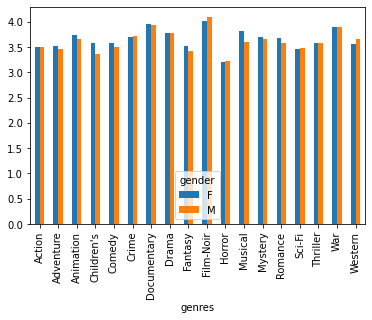

In [171]:
mean_ratings_gender.plot(kind="bar")